In [1]:
import sys
import muon as mu 
import numpy as np
import pandas as pd

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')


from Plotting.src import plot_umap_per_gene, plot_top_program_per_gene, perturbed_gene_dotplot,\
                         plot_log2FC, plot_volcano, programs_dotplots, analyze_correlations, \
                         convert_with_mygene, convert_adata_with_mygene, read_npz, \
                         merge_pdfs_in_folder, merge_svgs_to_pdf

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import muon as mu 
import scanpy as sc
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
import scanpy as sc
import anndata as ad
from pathlib import Path
from PIL import Image
import mygene
import os
from PyPDF2 import PdfMerger
import glob
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
from adjustText import adjust_text
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
#plt.rcParams["axes.spines.bottom"] = False
#plt.rcParams["axes.spines.left"] = False
plt.rcParams['pdf.fonttype'] = 42  # TrueType fonts (editable text)
plt.rcParams['ps.fonttype'] = 42   # For EPS as well

# Find perturbed gene

In [3]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval"
program_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
top_program = 5
gene_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.gene_spectra_score.k_100.dt_0_2.txt"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"


In [4]:
mdata = mu.read_h5mu(mdata_path)

# replace name
replacement_dict = {
    'sample_D3': 'D3',
    'sample_D2': 'D2', 
    'sample_D1': 'D1'
}  
mdata['rna'].obs['sample'] = mdata['rna'].obs['sample'].replace(replacement_dict)

perturbed_gene = np.unique(mdata['cNMF'].uns["guide_targets"])

/tmp/ipykernel_47444/3871938191.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['rna'].obs['sample'] = mdata['rna'].obs['sample'].replace(replacement_dict)


In [5]:
# found detected perturbed gene
gene_list = convert_with_mygene(pd.DataFrame(index=mdata.var_names.tolist())) # convert gene id to geene name
perturbed_gene_found = list(set(gene_list.index) & set(perturbed_gene))
len(perturbed_gene_found)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
211 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


56

In [6]:
# select gene of interest
Target_Gene = perturbed_gene_found[1]
Target_Gene

'SMARCD3'

# UMAP

In [7]:
def plot_umap_per_gene(mdata, Target_Gene, ax=None, color='purple', save_path=None, save_name=None, figsize=(8,6), show=False):

    renamed = convert_adata_with_mygene(mdata['rna'])
    
    # check if gene exist
    gene_name_list = renamed.var_names.tolist()
    if Target_Gene not in gene_name_list:
        print("gene name is not found in mdata")
        return None
    
    # set color
    colors = ['lightgrey', color]
    n_bins = 100
    cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
    
    #if save_name is None:
    
    title = save_name = f'{Target_Gene} Expression UMAP'
    
    # If no axis provided, create new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        standalone = True
    else:
        fig = ax.get_figure()
        standalone = False
    
    # Plot on the provided/created axis
    sc.pl.umap(renamed, color=Target_Gene, title=title, cmap=cmap, ax=ax, show=False)

    ax.set_title(title, fontweight='bold', loc='center')

    # Only save if standalone and save_path provided
    if standalone and save_path and save_name:
        fig.savefig(f"{save_path}/{save_name}.svg", format='svg', bbox_inches='tight', dpi=300)
    
    # Only show/close if standalone
    if standalone:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax
    

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


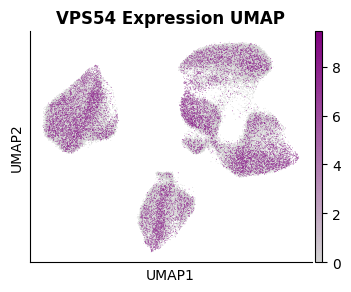

<Axes: title={'center': 'VPS54 Expression UMAP'}, xlabel='UMAP1', ylabel='UMAP2'>

In [8]:
plot_umap_per_gene(mdata, Target_Gene, figsize = (4,3), show = True)

# Top x assigned programs

In [8]:
def plot_top_program_per_gene(gene_loading_path, Target_Gene, top_program=10, 
                               species="human", ax=None, save_path=None, save_name=None, 
                               figsize=(5,8), show=False):

    # read cNMF gene program matrix
    df = pd.read_csv(gene_loading_path, sep='\t', index_col=0)
    
    # rename gene
    df_renamed = convert_with_mygene(df, species=species, index=False)
    
    # Check if gene exists
    if Target_Gene not in df_renamed.columns:
        print(f"Gene {Target_Gene} not found in data")
        return None
    
    # sort top x program
    df_sorted = df_renamed[Target_Gene].nlargest(top_program)
    
    # If no axis provided, create new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        standalone = True
    else:
        fig = ax.get_figure()
        standalone = False
    
    # Create horizontal bar plot
    bars = ax.barh(range(len(df_sorted)), df_sorted.values, color='#808080', alpha=0.8)
    
    # Customize the plot
    ax.set_yticks(range(len(df_sorted)))
    ax.set_yticklabels(df_sorted.index, fontsize=10)
    ax.set_xlabel('Gene Loading Score (z-score)', fontsize=11)
    ax.set_ylabel(f'Program Name')
    
    # Format x-axis
    ax.set_xlim(0, max(df_sorted.values) * 1.1)
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    # Add grid
    ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set title
    ax.set_title(f"Top Loading Program for {Target_Gene}", fontweight='bold', loc='center')
    
    # Only save if standalone and save_path provided
    if standalone and save_path and save_name:
        fig.savefig(f"{save_path}/{save_name}.svg", format='svg', bbox_inches='tight', dpi=300)
    
    # Only show/close if standalone
    if standalone:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


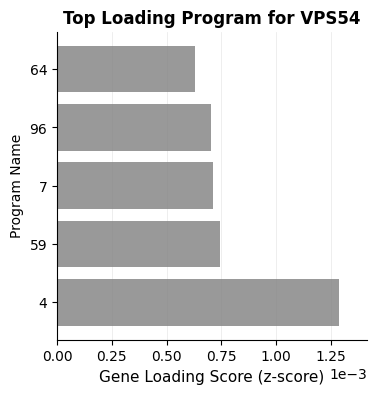

<Axes: title={'center': 'Top Loading Program for VPS54'}, xlabel='Gene Loading Score (z-score)', ylabel='Program Name'>

In [10]:
plot_top_program_per_gene(gene_loading_path, Target_Gene, top_program, figsize = (4,4), show = True)

# Dot plots

In [9]:
def perturbed_gene_dotplot(mdata, Target_Gene, groupby='sample', save_name=None, 
                          save_path=None, figsize=(3, 2), show=False, ax=None):
    # read in adata
    renamed = convert_adata_with_mygene(mdata['rna'])
    renamed.var_names_make_unique()
    
    if save_name is None:
        save_name = f"{Target_Gene} Expression by days"
    
    # Create the dotplot
    if ax is None:
        # Standalone mode - let scanpy create its own figure
        dp = sc.pl.dotplot(renamed, Target_Gene, groupby=groupby,
                          figsize=figsize, swap_axes=True, dendrogram=False, 
                          show=False, return_fig=True)
        dp.make_figure()
        fig = dp.fig
        ax = dp.ax_dict['mainplot_ax']
    else:
        # Gridspec mode - use provided ax
        fig = ax.get_figure()
        dp = sc.pl.dotplot(renamed, Target_Gene, groupby=groupby, 
                          swap_axes=True, dendrogram=False, show=False, 
                          return_fig=True, ax=ax)
        dp.make_figure()

    ax.set_title(f"{Target_Gene} Expression", fontweight='bold', loc='center')
    ax.set_ylabel('Gene')
    ax.set_xlabel( 'Day')
    
    # save fig (only in standalone mode)
    if save_name and save_path and ax is None:
        fig.savefig(f"{save_path}/{save_name}.png", format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot (only in standalone mode)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax 
    

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


<Axes: title={'center': 'VPS54 Expression'}, xlabel='Day', ylabel='Gene'>

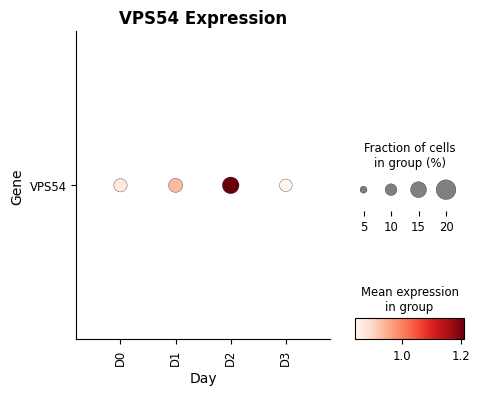

In [12]:
perturbed_gene_dotplot(mdata, Target_Gene, figsize = (5,4), show = True)

# Perturbation analysis of gene

In [10]:
def plot_log2FC(perturb_path, Target, tagert_col_name="target_name", plot_col_name="program_name", 
                log2fc_col='log2FC', num_item=5, p_value=0.05, save_path=None, save_name=None, 
                figsize=(5, 4), show=False, ax=None, Day =""):
    # read df
    df = pd.read_csv(perturb_path, sep="\t")
    # Sort by log2FC
    df_sorted = df.loc[df[tagert_col_name] == Target]
    df_sorted = df_sorted[df_sorted['adj_pval'] < p_value]
    df_sorted = df_sorted.sort_values(by=log2fc_col, ascending=False)
    # Get top and bottom gene
    top_df = df_sorted.head(num_item)
    bottom_df = df_sorted.tail(num_item)
    # Combine and add category
    top = top_df.copy()
    bottom = bottom_df.copy()
    # Combine data
    plot_data = pd.merge(top, bottom, how='outer')
    plot_data = plot_data.sort_values(by=log2fc_col, ascending=False)
    
    # Create the plot
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    
    # Create horizontal bar plot
    colors = ['red' if x > 0 else 'blue' for x in plot_data[log2fc_col]]
    bars = ax.barh(range(len(plot_data)), plot_data[log2fc_col], color=colors, alpha=0.7)
    
    # Customize the plot
    ax.set_yticks(range(len(plot_data)))
    ax.set_yticklabels(plot_data[plot_col_name])
    ax.set_xlabel('Effect on Program Expression (log2 fold-change)')
    ax.set_ylabel( "Program Name")
    ax.set_title(save_name, fontweight='bold')
    
    # Add a vertical line at x=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

    ax.set_title(f"Program Log2 Fold-Change with {Target_Gene} {Day}", fontweight='bold', loc='center')

    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Upregulated'),
                      Patch(facecolor='blue', alpha=0.7, label='Downregulated')]
    ax.legend(handles=legend_elements) #loc='lower right')
    
    # Adjust layout
    ax.grid(axis='x', alpha=0.3)
    
    # Save if path provided (only when ax is not provided)
    if save_path and ax is None:
        fig.savefig(f'{save_path}/{save_name}.svg', format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot (only when ax is not provided)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax, plot_data
    

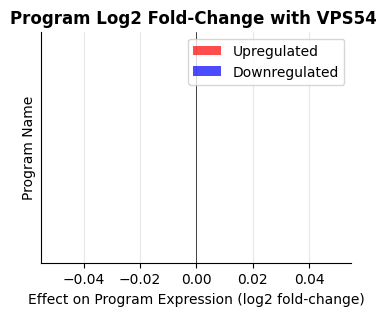

In [27]:
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

_,df = plot_log2FC(perturb_path, Target = Target_Gene, tagert_col_name = "target_name", plot_col_name = "program_name", p_value = 0.05, figsize = (4,3), show = True)

In [13]:
def plot_volcano(perturb_path, Target, tagert_col_name="target_name", plot_col_name="program_name", 
                 down_thred_log=-0.05, up_thred_log=0.05, p_value=0.05, save_path=None, 
                 save_name=None, figsize=(5, 4), show=False, ax=None, Day =""):
                 
    df = pd.read_csv(perturb_path, sep="\t")
    df_program = df.loc[df[tagert_col_name] == Target]
    
    # Create figure/axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    
    # Plot all points
    ax.scatter(x=df_program['log2FC'], 
               y=df_program['adj_pval'].apply(lambda x: -np.log10(x)), 
               s=1, label="Not significant", color="grey")
    
    # Highlight down- or up-regulated genes
    down = df_program[(df_program['log2FC'] <= down_thred_log) & 
                      (df_program['adj_pval'] <= p_value)]
    up = df_program[(df_program['log2FC'] >= up_thred_log) & 
                    (df_program['adj_pval'] <= p_value)]
    
    ax.scatter(x=down['log2FC'], 
               y=down['adj_pval'].apply(lambda x: -np.log10(x)), 
               s=3, label="Down-regulated", color="blue")
    ax.scatter(x=up['log2FC'], 
               y=up['adj_pval'].apply(lambda x: -np.log10(x)), 
               s=3, label="Up-regulated", color="red")
    
    # Add text labels
    for i, r in up.iterrows():
        ax.text(x=r['log2FC'], y=-np.log10(r['adj_pval']), s=r[plot_col_name])
    for i, r in down.iterrows():
        ax.text(x=r['log2FC'], y=-np.log10(r['adj_pval']), s=r[plot_col_name])
    
    # Set labels and lines
    ax.set_xlabel('Effect on Program Expression (log2 fold-change)')
    ax.set_ylabel("Adjusted p-value, -log10")
    ax.axvline(down_thred_log, color="grey", linestyle="--")
    ax.axvline(up_thred_log, color="grey", linestyle="--")
    ax.axhline(-np.log10(p_value), color="grey", linestyle="--")
    ax.legend()
    ax.set_title(f"Volcano Plot for {Target} {Day}", fontweight='bold', loc='center')

    
    # Save if path provided (only when ax is not provided)
    if save_path and ax is None:
        fig.savefig(f'{save_path}/{save_name}.svg', format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot (only when ax is not provided)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax, pd.merge(up, down, how='outer')
    

(<Axes: title={'center': 'Volcano Plot for VPS54 '}, xlabel='Effect on Program Expression (log2 fold-change)', ylabel='Adjusted p-value, -log10'>,
 Empty DataFrame
 Columns: [target_name, program_name, ref_mean, test_mean, log2FC, stat, pval, adj_pval]
 Index: [])

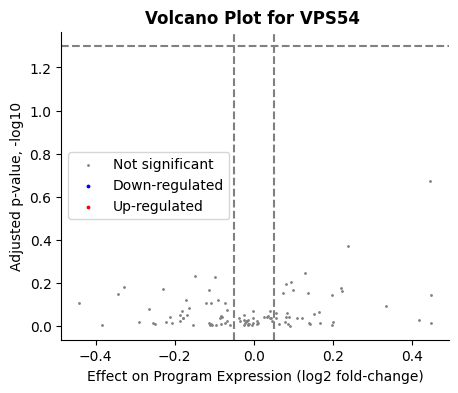

In [28]:
plot_volcano(perturb_path, Target = Target_Gene, down_thred_log = -0.05, up_thred_log = 0.05, p_value = 0.05, figsize = (5,4),show = True)

In [14]:
def programs_dotplots(mdata, program_loading_path, Target, groupby="sample", program_list=None,
                      save_path=None, save_name=None, figsize=(5, 4), show=False, ax=None, Day = None):
    # load data
    df = pd.read_csv(program_loading_path, sep='\t', index_col=0)
    
    # make anndata from program loadings
    adata_new = ad.AnnData(X=df.values)
    adata_new.obs[groupby] = mdata['rna'].obs[groupby].values
    
    
    gene_list = adata_new.var_names.tolist()
    
    if program_list is not None:
        gene_list = list(map(str, program_list))
    
    if not gene_list:
        # Handle empty gene list
        if ax is None:
            blank_img = np.ones((400, 400, 3), dtype=np.uint8) * 255
            img = Image.fromarray(blank_img)
            img.save(full_path)
            return None, None
        else:
            ax.text(0.5, 0.5, 'No programs to display', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"{Target} Perturbed Program Loading Scores {Day}", fontweight='bold', loc='center')
            return ax, None
    
    gene_list = gene_list[::-1]
    
    # Create dotplot
    if ax is None:
        # Standalone mode - let scanpy create its own figure
        dp = sc.pl.dotplot(adata_new, gene_list, groupby=groupby, swap_axes=True, figsize=figsize,
                          dendrogram=False, show=False, return_fig=True)
        dp.make_figure()
        fig = dp.fig
        ax = dp.ax_dict['mainplot_ax']
    else:
        # Gridspec mode - use provided ax
        fig = ax.get_figure()
        dp = sc.pl.dotplot(adata_new, gene_list, groupby=groupby, swap_axes=True, figsize=figsize,
                          dendrogram=False, show=False, return_fig=True, ax=ax)
        dp.make_figure()


    ax.set_title(f"{Target} Perturbed Program Loading Scores {Day}", fontweight='bold', loc='center')
    ax.set_ylabel('Program Name')
    ax.set_xlabel("Day")
    
    
    # Save if path provided (only when ax is not provided)
    if save_path and ax is None:
        fig.savefig(f'{save_path}/{save_name}.svg', format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot (only in standalone mode)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax
    

<Axes: title={'center': 'VPS54 Perturbed Program Loading Scores None'}, xlabel='Day', ylabel='Program Name'>

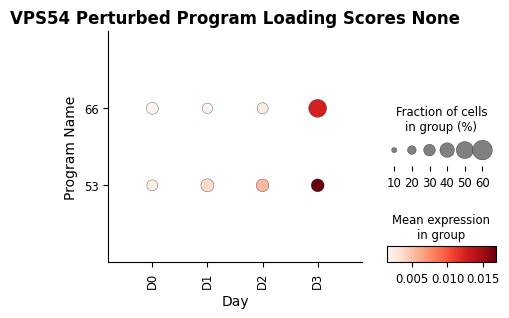

In [18]:

programs_dotplots(mdata, program_loading_path, program_list = df["program_name"].tolist(), Target = Target_Gene, save_path = None, save_name = None, figsize = (5,3),show = True)

# Correlation of program

In [11]:
def analyze_correlations(gene_loading_path, Target, top_num=5, save_path=None, 
                         save_name=None, figsize=(10, 8), show=False, ax=None):
    # read data
    df = pd.read_csv(gene_loading_path, sep='\t', index_col=0)
    df_rename = convert_with_mygene(df, index=False)  # rename
    
    # Calculate correlation matrix
    correlation_matrix = df_rename.corr()
    
    # Get correlations with the target program
    target_correlations = correlation_matrix[Target]
    target_correlations = target_correlations.drop(Target)  # Remove self-correlation
    
    # Sort correlations
    sorted_correlations = target_correlations.sort_values(ascending=False)
    
    # Get top and bottom gene
    top = sorted_correlations.head(top_num)
    bottom = sorted_correlations.tail(top_num)
    
    # Combine for plotting
    combined_correlations = pd.concat([bottom, top])
    combined_correlations = combined_correlations.sort_values(ascending=False)
    
    # Create figure/axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    
    # Create horizontal bar plot
    colors = ['blue' if x < 0 else 'red' for x in combined_correlations]
    bars = ax.barh(range(len(combined_correlations)), combined_correlations.values, 
                   color=colors, alpha=0.7)
    
    # Customize the plot
    ax.set_title(f"Gene Loading Correlation for {Target_Gene}", fontweight='bold', loc = 'center')
    ax.set_ylabel('Simliar Gene')
    ax.set_xlabel('Correlation Coefficient')
    
    # Set y-axis labels
    ax.set_yticks(range(len(combined_correlations)))
    ax.set_yticklabels(combined_correlations.index, rotation=45, ha='right')
    
    # Add a vertical line at x=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Positive correlation'),
                      Patch(facecolor='blue', alpha=0.7, label='Negative correlation')]
    ax.legend(handles=legend_elements )# loc='lower right')
    
    # Add grid
    ax.grid(axis='x', alpha=0.3)
    
    # Adjust layout (only in standalone mode)
    if ax is None:
        plt.tight_layout()
    
    # Save if path provided (only in standalone mode)
    if save_path and ax is None:
        fig.savefig(f'{save_path}/{save_name}.svg', format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot (only in standalone mode)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    return ax, combined_correlations
    

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS


(<Axes: title={'center': 'Gene Loading Correlation for VPS54'}, xlabel='Correlation Coefficient', ylabel='Simliar Gene'>,
 DANT2        0.572763
 PDSS2        0.510805
 PAN3         0.502292
 PTEN         0.492337
 CLOCK        0.473164
 CLDN7       -0.271572
 FN3KRP      -0.273235
 LINC02972   -0.273990
 LRP3        -0.296211
 MSN         -0.313356
 Name: VPS54, dtype: float64)

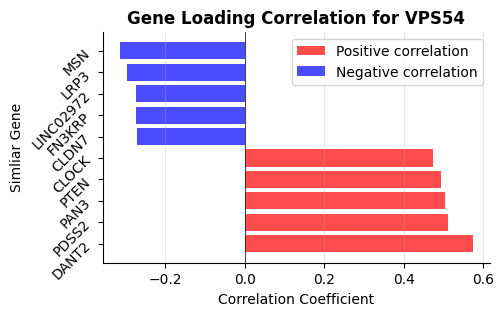

In [20]:
analyze_correlations(gene_loading_path,Target_Gene, figsize = (5,3), show = True)

# Waterfall plot

In [12]:
def create_gene_correlation_waterfall(perturb_path, Target_Gene, top_num=5, save_path=None, 
                         save_name=None, figsize=(3, 5), show=False, ax=None, Day =""):

    # Read data
    df = pd.read_csv(perturb_path, sep='\t', index_col=0)
    
    # Check if query gene exists in dataframe
    if Target_Gene not in df.index:
        raise ValueError(f"Gene {Target_Gene} not found in dataframe index")
    
    # Get log2FC values for query gene across all programs
    df_gene = df.loc[Target_Gene]
    df_gene_log2fc = df_gene["log2FC"]
    
    correlations = {}
    for gene in df.index:
        if gene != Target_Gene:
            gene_values = df.loc[gene]
            gene_log2fc = gene_values["log2FC"]
            corr, _ = pearsonr(df_gene_log2fc, gene_log2fc)
            correlations[gene] = corr
    
    # Convert to DataFrame and sort
    corr_df = pd.DataFrame(list(correlations.items()),
                           columns=['gene', 'correlation'])
    corr_df = corr_df.sort_values('correlation', ascending=False)
    
    # Get top N positive and bottom N negative correlations for labeling
    top_positive = corr_df.head(top_num)
    top_negative = corr_df.tail(top_num)
    genes_to_label = set(top_positive['gene'].tolist() + top_negative['gene'].tolist())
    
    # Use ALL correlations for plotting
    plot_data = corr_df.reset_index(drop=True)

    # Create figure/axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    
    
    # Plot the line
    ax.plot(range(len(plot_data)), plot_data['correlation'], 
            color='gray', linewidth=2, marker='o', markersize=4)
    
    # Add horizontal reference line at y=0
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    
    # Remove x-axis labels
    ax.set_xticks([])

    ax.set_title(f"Gene Perturbation Correlation for {Target_Gene} {Day}", fontweight='bold', loc = 'center')

    
    # Highlight the labeled genes with larger markers and add annotations
    texts = []
    for idx, row in plot_data.iterrows():
        if row['gene'] in genes_to_label:
            ax.plot(idx, row['correlation'], 'o', color='darkgray', markersize=8, zorder=5)
            # Add gene name annotation
            text = ax.text(idx, row['correlation'], row['gene'],
                          fontsize=10,
                          style='italic',
                          ha='center')
            texts.append(text)
    
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5), ax=ax) 
    
    ax.set_ylabel(f'Correlation of program\nexpression with\n{Target_Gene} perturbation')
    ax.set_xlabel('Perturbed genes')
    #ax.set_ylim(-1, 1)
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Adjust layout (only in standalone mode)
    if ax is None:
        plt.tight_layout()
    
    # Save if path provided (only in standalone mode)
    if save_path and ax is None:
        fig.savefig(f'{save_path}/{save_name}.svg', format='svg', bbox_inches='tight', dpi=300)
    

    # Control whether to display the plot (only in standalone mode)
    if ax is None:
        if show:
            plt.show()
        else:
            plt.close(fig)
    
    
    return ax


1 [0.11528792 0.80512017]
2 [ 0.28755452 -0.28743581]


<Axes: title={'center': 'Gene Perturbation Correlation for VPS54 '}, xlabel='Perturbed genes', ylabel='Correlation of program\nexpression with\nVPS54 perturbation'>

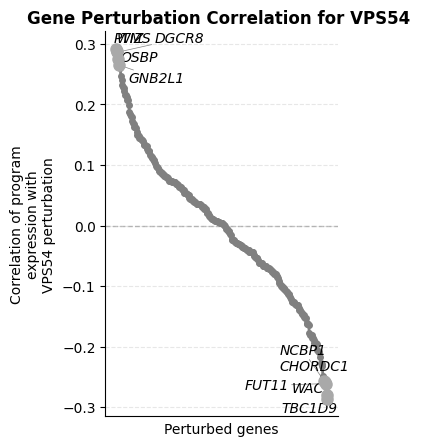

In [25]:
create_gene_correlation_waterfall(perturb_path, Target_Gene, top_num=5) 


# Make SVG

In [15]:
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Plot"
program_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240701_cNMF/output/all/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt"
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
top_program = 5
gene_loading_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.gene_spectra_score.k_100.dt_0_2.txt"
perturb_path_all = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample"
perturb_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"


In [18]:
def create_comprehensive_plot(
    mdata,
    perturb_path,
    gene_loading_path,
    program_loading_path,
    Target_Gene,
    top_program=10,
    species="human", 
    groupby='sample',
    tagert_col_name="target_name",
    plot_col_name="program_name",
    log2fc_col='log2FC',
    num_item=5,
    top_num=5,
    down_thred_log=-0.05,
    up_thred_log=0.05,
    p_value=0.05,
    save_path=None,
    save_name=None,
    figsize=(25, 20),
    show=True,
    PDF = True
):

    # Create figure with custom gridspec for 4-5-5-5 layout
    fig = plt.figure(figsize=figsize)
    
    # Create gridspec with 5 rows using 20 columns for flexibility
    gs = gridspec.GridSpec(5, 20, figure=fig)
    
    # First row: 4 plots (each takes 5 columns out of 20)
    ax1 = fig.add_subplot(gs[0, 0:5])    # UMAP
    ax2 = fig.add_subplot(gs[0, 5:10])   # Top program
    ax3 = fig.add_subplot(gs[0, 10:15])  # Perturbed gene dotplot
    ax4 = fig.add_subplot(gs[0, 15:20])  # Correlation analysis
    
    ax5 = fig.add_subplot(gs[1, 0:5])    # D0 - Log2FC
    ax6 = fig.add_subplot(gs[1, 5:10])    # D0 - Volcano
    ax7 = fig.add_subplot(gs[1, 10:15])   # D0 - Dotplot
    ax8 = fig.add_subplot(gs[1, 15:20])  # D0 - Waterfall

    ax9 = fig.add_subplot(gs[2, 0:5])  # D1 - Log2FC
    ax10 = fig.add_subplot(gs[2, 5:10])   # D1 - Volcano
    ax11 = fig.add_subplot(gs[2, 10:15])   # D1 - Dotplot
    ax12 = fig.add_subplot(gs[2, 15:20])  # D1 - Waterfall

    ax13 = fig.add_subplot(gs[3, 0:5]) # D2 - Log2FC
    ax14 = fig.add_subplot(gs[3, 5:10]) # D2 - Volcano    
    ax15 = fig.add_subplot(gs[3, 10:15])   # D2 - Dotplot
    ax16 = fig.add_subplot(gs[3, 15:20])   # D2 - Waterfall

    ax17 = fig.add_subplot(gs[4, 0:5])  # D3 - Log2FC
    ax18 = fig.add_subplot(gs[4, 5:10]) # D3 - Volcano
    ax19 = fig.add_subplot(gs[4, 10:15]) # D3 - Dotplot
    ax20 = fig.add_subplot(gs[4, 15:20])   # D3 - Dotplot

    

    
    # List of all axes for easy access
    axes = [ax1, ax2, ax3, ax4,         
            ax5, ax6, ax7, ax8, ax9,     
            ax10, ax11, ax12, ax13, ax14,  
            ax15, ax16, ax17, ax18, ax19, ax20]  

    # Plot 1: UMAP
    ax1 = plot_umap_per_gene(
        mdata=mdata,
        Target_Gene=Target_Gene, 
        figsize=(4, 3),
        ax=ax1
    )
    
    # Plot 2: Top program 
    ax2 = plot_top_program_per_gene(
        gene_loading_path=gene_loading_path,
        Target_Gene=Target_Gene,
        top_program=top_program,
        species=species, 
        ax=ax2,
        figsize=(5, 8)
    )
    
    # Plot 3: Perturbed gene dotplot
    ax3 = perturbed_gene_dotplot(
        mdata=mdata,
        Target_Gene=Target_Gene,
        groupby=groupby,
        figsize=(3, 2),
        ax=ax3
    )
    
    # Plot 4: Correlation analysis
    ax4, corr_data = analyze_correlations(
        gene_loading_path=gene_loading_path,
        Target=Target_Gene,
        top_num=top_num,
        figsize=(5, 3),
        ax=ax4
    )

    # Loop through samples and create 4 plots per sample (Log2FC, Volcano, Dotplot, Waterfall)
    samples = ['D0', 'sample_D1', 'sample_D2', 'sample_D3']
    ax_index = 4  # Start from ax5 (index 4)
    
    for idx, samp in enumerate(samples):
        file_name = f"{perturb_path}_{samp}_perturbation_association.txt" 
        Day = f'D{idx}'

        # Plot 1: Log2FC plot
        current_ax = axes[ax_index]
        current_ax, df = plot_log2FC( 
            perturb_path=file_name, 
            Target=Target_Gene, 
            tagert_col_name=tagert_col_name, 
            plot_col_name=plot_col_name, 
            p_value=p_value,
            figsize=(4, 3),
            ax=current_ax,
            Day=Day
        )
        ax_index += 1
        
        # Plot 2: Volcano plot
        current_ax = axes[ax_index]
        current_ax, program = plot_volcano(
            perturb_path=file_name, 
            Target=Target_Gene, 
            down_thred_log=down_thred_log, 
            up_thred_log=up_thred_log, 
            p_value=p_value,
            figsize=(5, 4), 
            ax=current_ax,
            Day=Day
        )
        ax_index += 1

        # Plot 3: Programs dotplot
        current_ax = axes[ax_index]
        current_ax = programs_dotplots(
            mdata, 
            program_loading_path=program_loading_path, 
            program_list=df["program_name"].tolist(),
            Target=Target_Gene,
            figsize=(5, 3),
            ax=current_ax,
            Day=Day
        )
        ax_index += 1
        
        # Plot 4: Waterfall plot (NEW)
        current_ax = axes[ax_index]
        current_ax = create_gene_correlation_waterfall(
            # Add your waterfall function parameters here
            perturb_path=file_name,
            Target_Gene=Target_Gene,
            ax=current_ax,
            Day=Day,
            figsize=(4, 3),
        )
        ax_index += 1

    # Add main title
    fig.suptitle(f'Comprehensive Analysis: {Target_Gene}', fontweight='bold', y=0.995)
    
    # Adjust layout
    fig.subplots_adjust(left=0.05, right=0.95, top=0.96, bottom=0.04, hspace=0.3, wspace=0.3)

    
    # Save if path provided
    if save_path and save_name and PDF:
        full_path = f"{save_path}/{save_name}.pdf"
        print(f"Saving figure to {full_path}...")
        fig.savefig(full_path, format='pdf', bbox_inches='tight', dpi=300)
    
    if save_path and save_name and not PDF:
        full_path = f"{save_path}/{save_name}.svg"
        print(f"Saving figure to {full_path}...")
        fig.savefig(full_path, format='svg', bbox_inches='tight', dpi=300)
    
    # Control whether to display the plot
    if show:
        plt.show()
    else:
        plt.close(fig)
    
    return fig
 

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000228566', 2), ('ENSG00000234352', 2), ('ENSG00000257545', 2)]
111 input query terms found no hit:	['ENSG00000130489', 'ENSG00000161149', 'ENSG00000167945', 'ENSG00000182912', 'ENSG00000186354', 'ENS
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 in

Saving figure to /oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline/Plotting/JupterNote_Version/test.pdf...


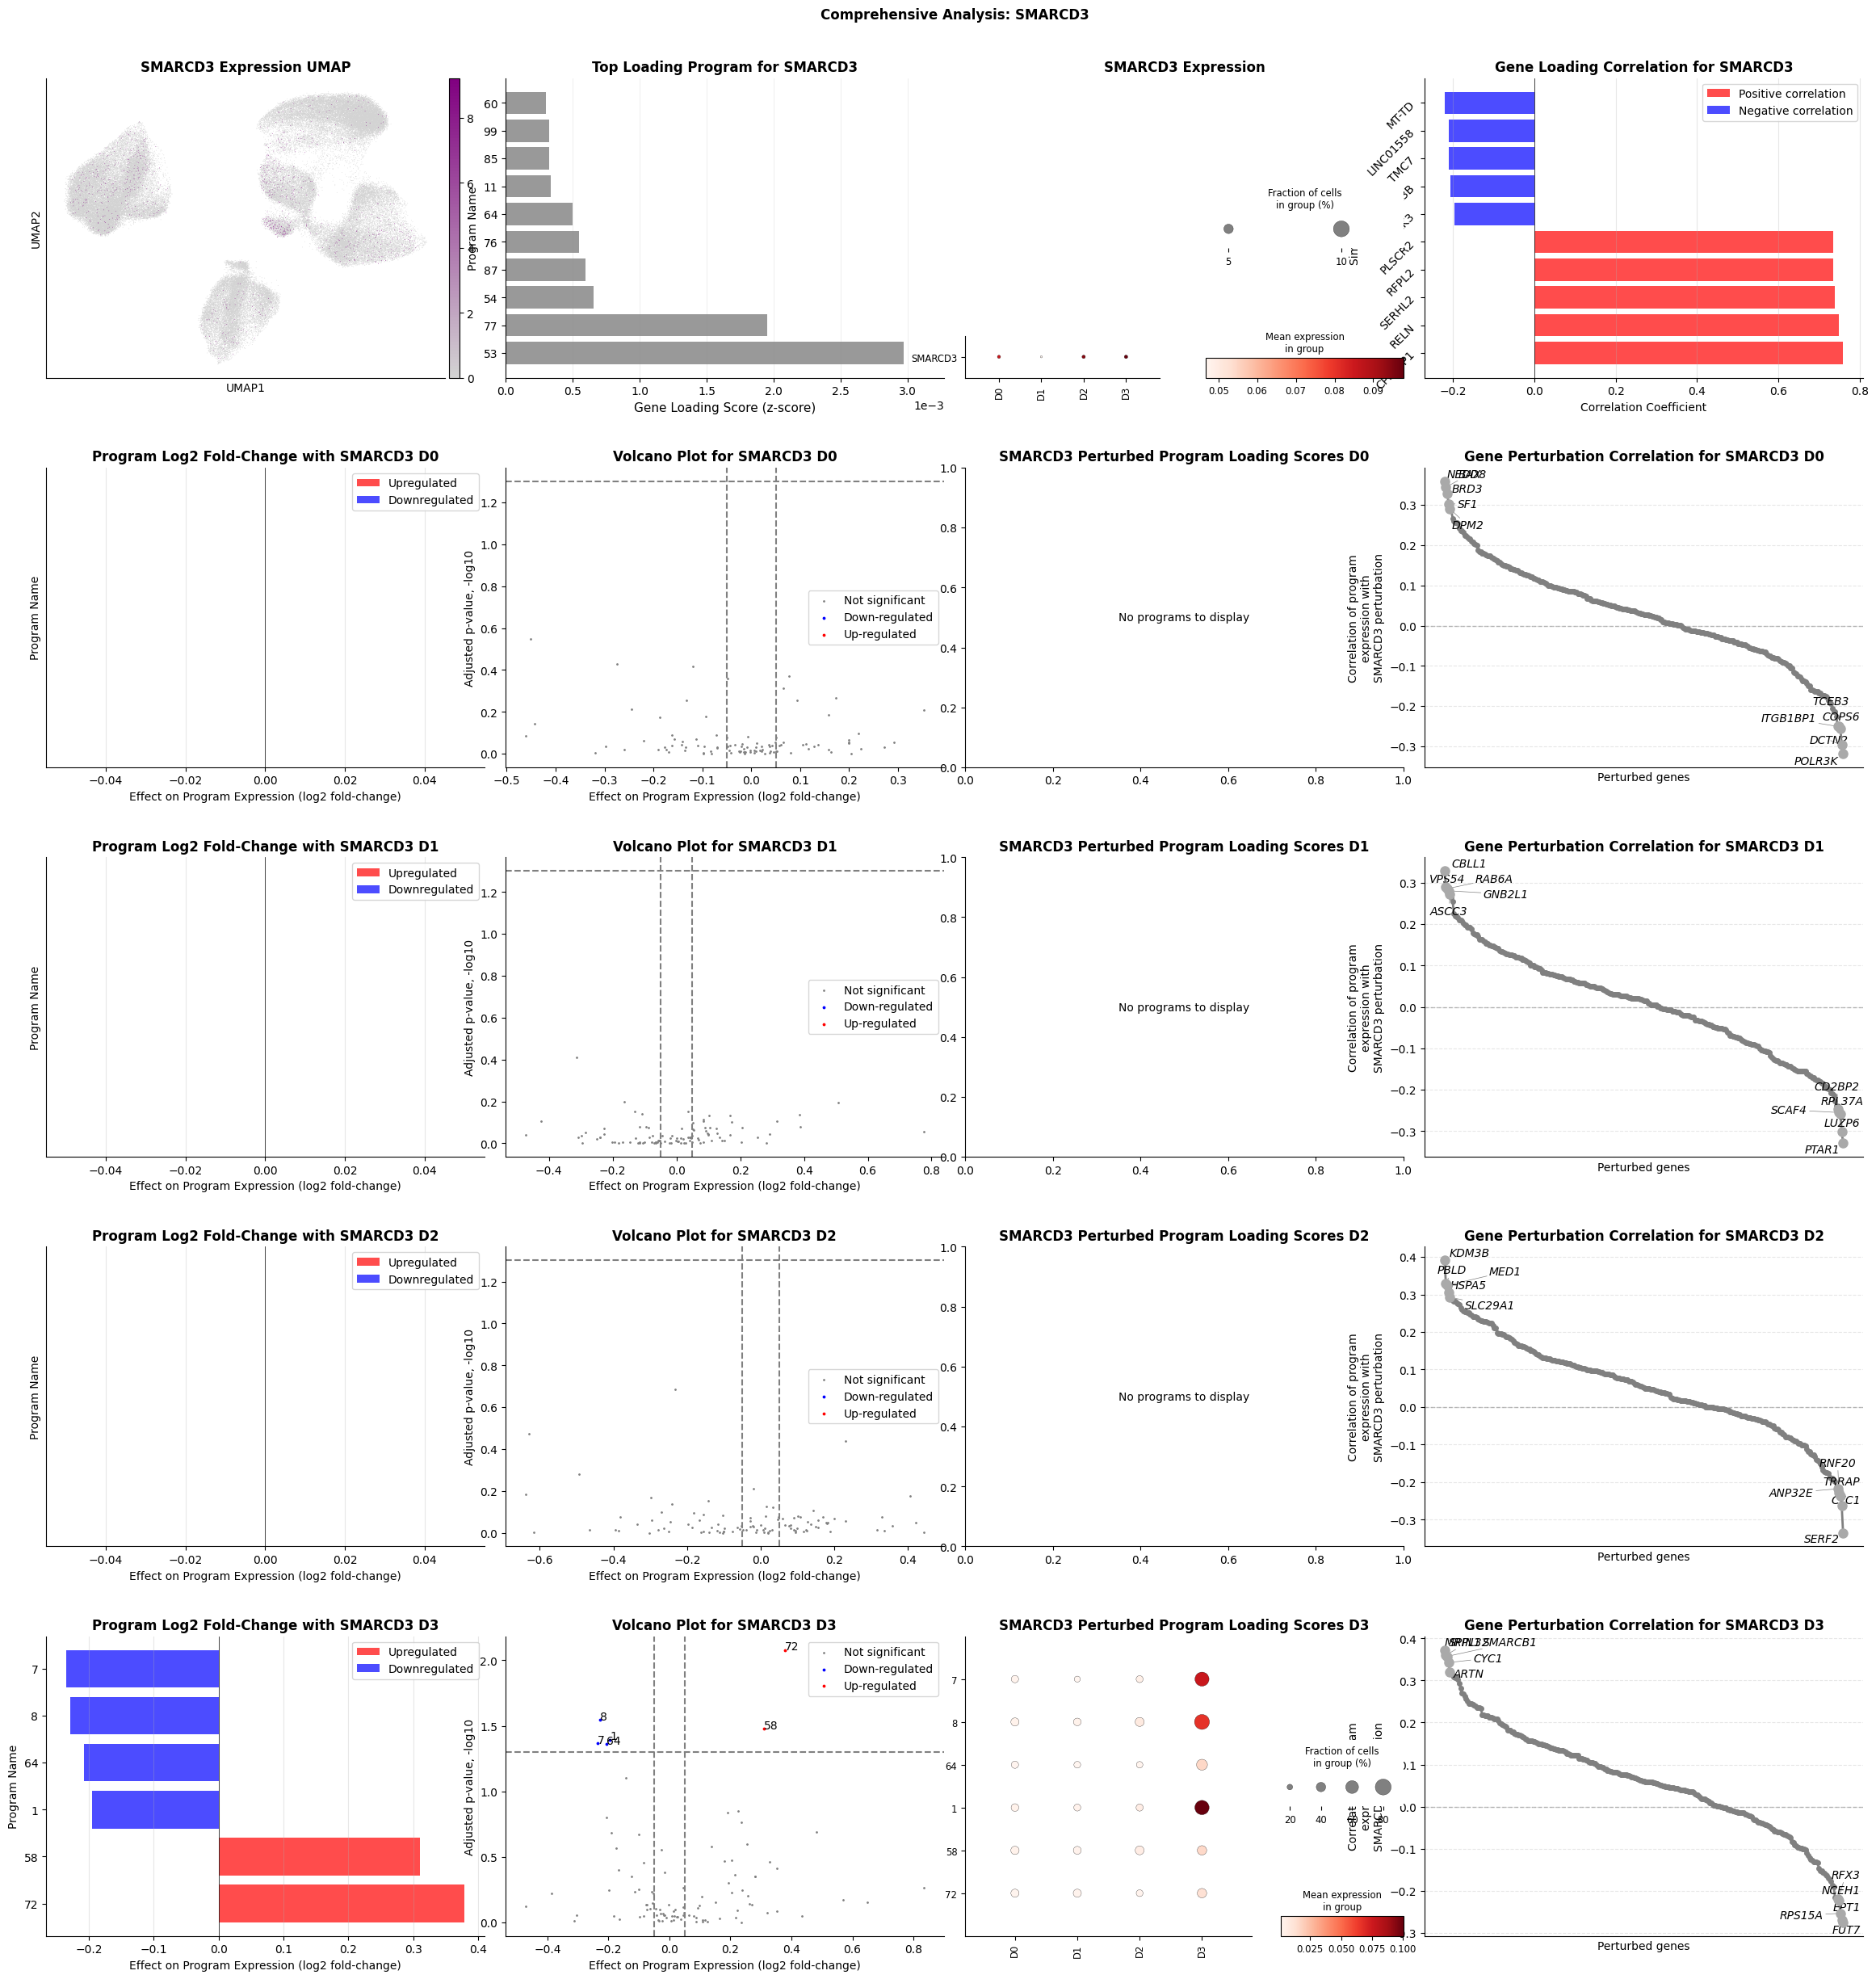

In [19]:
create_comprehensive_plot(
    mdata,
    perturb_path_all,
    gene_loading_path,
    program_loading_path,
    Target_Gene,
    save_path="/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline/Plotting/JupterNote_Version",
    save_name="test",
    figsize=(25, 25),
    show=False
)

In [ ]:
# Graph all pdf 
for gene in perturbed_gene_found:

    create_comprehensive_plot(
        mdata,
        perturb_path_all,
        gene_loading_path,
        program_loading_path,
        Target_Gene,
        save_path=save_path,
        save_name= gene,
        figsize=(25, 25),
        show=False,
        PDF = True
    )
    

# make PDF

In [4]:
def merge_svgs_to_pdf(folder_path, output_filename="merged_perturbed_gene_QC.pdf"):

    svg_files = glob.glob(os.path.join(folder_path, "*.svg"))
    print(f"Found {len(svg_files)} SVG files")
    
    merger = PdfMerger()
    temp_pdfs = []
    
    for svg_file in svg_files:
        try:
            # Convert SVG to PDF
            drawing = svg2rlg(svg_file)
            temp_pdf = svg_file.replace('.svg', '_temp.pdf')
            renderPDF.drawToFile(drawing, temp_pdf)
            temp_pdfs.append(temp_pdf)
            merger.append(temp_pdf)
        except Exception as e:
            print(f"Error processing {svg_file}: {str(e)}")
    
    # Save merged PDF
    output_path = os.path.join(folder_path, output_filename)
    with open(output_path, 'wb') as f:
        merger.write(f)
    merger.close()
    
    # Clean up temp files
    for temp_pdf in temp_pdfs:
        os.remove(temp_pdf)
    
    print(f"PDF created with {len(svg_files)} pages: {output_path}")
    

In [5]:
merge_svgs_to_pdf(folder_path = save_path)

Found 56 SVG files
PDF created with 56 pages: /oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Plot/merged_perturbed_gene_QC.pdf
